<a href="https://colab.research.google.com/github/PaolaMaribel18/pry-ml-prescriptive-analytics/blob/main/ml_pry2_IB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#Importing datasets

In [53]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',delimiter=',')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Changping_20130301-20170228.csv',delimiter=',')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Dingling_20130301-20170228.csv',delimiter=',')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Dongsi_20130301-20170228.csv',delimiter=',')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Guanyuan_20130301-20170228.csv',delimiter=',')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Gucheng_20130301-20170228.csv',delimiter=',')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Huairou_20130301-20170228.csv',delimiter=',')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',delimiter=',')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Shunyi_20130301-20170228.csv',delimiter=',')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Tiantan_20130301-20170228.csv',delimiter=',')
df11 = pd.read_csv('/content/drive/MyDrive//Colab Notebooks/data/PRSA_Data_Wanliu_20130301-20170228.csv',delimiter=',')
df12= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv',delimiter=',')

##Merging the datasets



In [54]:
#All the DataFrames are merged into a larger single DataFrame to treat the entire city of Beijing
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
# Use pd.concat() to concatenate the DataFrames.
concatenated_df = pd.concat(dataframes)

In [55]:
concatenated_base=concatenated_df
concatenated_base

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [56]:
concatenated_df.columns


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [57]:
#Dropping the "No" column because it only shows us information about the row number
concatenated_df=concatenated_df.drop('No',axis=1)

In [58]:
#Cambio de nombre debido a la ambiguedad de las columnas wd y WSPM
concatenated_df=concatenated_df.rename(columns={'wd': 'WindDirection','WSPM': 'WindSpeed',})

In [59]:
#Transform the variables 'year', 'month', 'day', and 'hour' into a date and time format.
concatenated_df['Date']=pd.to_datetime(concatenated_df[['year','month','day','hour']])
#Dropping the columns 'year','month','hour'
#concatenated_df=concatenated_df.drop('year',axis=1)
#concatenated_df=concatenated_df.drop('month',axis=1)
#concatenated_df=concatenated_df.drop('day',axis=1)
#concatenated_df=concatenated_df.drop('hour',axis=1)
concatenated_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WindDirection,WindSpeed,station,Date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


In [60]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv',delimiter=',')
df_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02,183.820007,187.300003,183.419998,187.179993,182.199005,17731300
1,2018-07-03,187.789993,187.949997,183.539993,183.919998,179.025772,13954800
2,2018-07-05,185.259995,186.410004,184.279999,185.399994,180.466370,16604200
3,2018-07-06,185.419998,188.429993,185.199997,187.970001,182.967972,17485200
4,2018-07-09,189.500000,190.679993,189.300003,190.580002,185.508545,19756600
...,...,...,...,...,...,...,...
498,2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800
499,2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600
500,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
501,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500


In [61]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv',delimiter=',')
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-02,183.820007,187.300003,183.419998,187.179993,182.199005,17731300
1,2018-07-03,187.789993,187.949997,183.539993,183.919998,179.025772,13954800
2,2018-07-05,185.259995,186.410004,184.279999,185.399994,180.466370,16604200
3,2018-07-06,185.419998,188.429993,185.199997,187.970001,182.967972,17485200
4,2018-07-09,189.500000,190.679993,189.300003,190.580002,185.508545,19756600
...,...,...,...,...,...,...,...
498,2020-06-24,365.000000,368.790009,358.519989,360.059998,360.059998,48155800
499,2020-06-25,360.700012,365.000000,357.570007,364.839996,364.839996,34380600
500,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
501,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500


##Calculate AQI

In [62]:
# Define the breakpoints and ranges for PM 2.5
pm25_breakpoints = [(0, 12), (12.1, 35.4), (35.5, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 350.4), (350.5, 500)]
pm25_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for PM10
pm10_breakpoints = [(0, 54), (55, 154), (155, 254), (255, 354), (355, 424), (425, 504), (505, 604)]
pm10_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for SO2
so2_breakpoints = [(0, 35), (36, 75), (76, 185), (186, 304), (305, 604), (605, 804), (805, 1004)]
so2_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for NO2 (example)
no2_breakpoints = [(0, 53), (54, 100), (101, 360), (361, 649), (650, 1249), (1250, 1649), (1650, 2049)]
no2_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for CO (example)
co_breakpoints = [(0, 4.4), (4.5, 9.4), (9.5, 12.4), (12.5, 15.4), (15.5, 30.4), (30.5, 40.4), (40.5, 50.4)]
co_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]

# Define the breakpoints and ranges for O3 (example)
o3_breakpoints = [(0, 54), (55, 70), (71, 85), (86, 105), (106, 200), (201, 300), (301, 400)]
o3_aqi_range = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 300), (301, 400), (401, 500)]
# Function to calculate the AQI for a specific column
def calculate_aqi_column(df, column_name, breakpoints, aqi_range):
    df['AQI_' + column_name] = df[column_name].apply(lambda x: calculate_aqi(x, breakpoints, aqi_range))

# Function to calculate the overall AQI
def calculate_aqi_general(df, column_names):
    df['AQI'] = df[column_names].max(axis=1)

# Function to calculate the AQI for a given concentration value
def calculate_aqi(concentration, breakpoints, aqi_range):
    for i in range(len(breakpoints)):
        low, high = breakpoints[i]
        aqi_low, aqi_high = aqi_range[i]
        if low <= concentration <= high:
            aqi = ((aqi_high - aqi_low) / (high - low)) * (concentration - low) + aqi_low
            return int(aqi)
    return 0

# Calculate the AQI for each pollutant column
calculate_aqi_column(concatenated_df, 'PM2.5', pm25_breakpoints, pm25_aqi_range)
calculate_aqi_column(concatenated_df, 'PM10', pm10_breakpoints, pm10_aqi_range)
calculate_aqi_column(concatenated_df, 'SO2', so2_breakpoints, so2_aqi_range)
calculate_aqi_column(concatenated_df, 'NO2', no2_breakpoints, no2_aqi_range)
calculate_aqi_column(concatenated_df, 'CO', co_breakpoints, co_aqi_range)
calculate_aqi_column(concatenated_df, 'O3', o3_breakpoints, o3_aqi_range)

# Calculate the overall AQI
calculate_aqi_general(concatenated_df, ['AQI_PM2.5', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3'])


In [63]:
concatenated_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,WindSpeed,station,Date,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,4.4,Aotizhongxin,2013-03-01 00:00:00,16,3,5,6,0,122,122
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,4.7,Aotizhongxin,2013-03-01 01:00:00,33,7,5,6,0,122,122
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,5.6,Aotizhongxin,2013-03-01 02:00:00,29,6,7,9,0,108,108
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,3.1,Aotizhongxin,2013-03-01 03:00:00,25,5,15,10,0,104,104
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,2.0,Aotizhongxin,2013-03-01 04:00:00,12,2,17,11,0,104,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,2.4,Wanshouxigong,2017-02-28 19:00:00,45,29,4,22,0,104,104
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,0.9,Wanshouxigong,2017-02-28 20:00:00,52,29,4,38,0,46,52
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,1.1,Wanshouxigong,2017-02-28 21:00:00,54,25,5,35,0,50,54
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,...,1.2,Wanshouxigong,2017-02-28 22:00:00,50,21,5,28,0,64,64


#Exploratory analysis of data

##Temperature as a function of PM2.5 concentration.



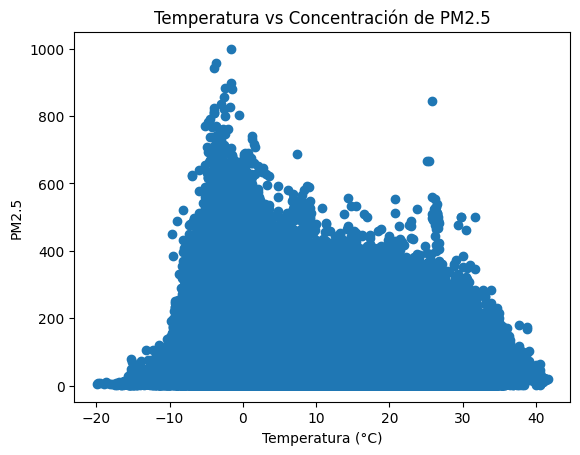

In [64]:
# Graficar la temperatura en función de la concentración de PM2.5
plt.scatter(concatenated_df['TEMP'], concatenated_df['PM2.5'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('PM2.5')
plt.title('Temperatura vs Concentración de PM2.5')
plt.show()

In [65]:
concatenated_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,DEWP,RAIN,WindSpeed,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,...,420365.000000,420378.000000,420450.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768.000000,420768.00000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,...,2.490822,0.064476,1.729711,134.153821,70.275565,20.396290,45.438985,0.0,79.859079,165.33355
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,...,13.793847,0.821004,1.246386,83.565877,54.235998,25.950735,31.268973,0.0,92.366861,85.58213
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,...,-43.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,...,-8.900000,0.000000,0.900000,65.000000,31.000000,2.000000,19.000000,0.0,7.000000,99.00000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,...,3.100000,0.000000,1.400000,144.000000,63.000000,10.000000,39.000000,0.0,39.000000,162.00000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,...,15.100000,0.000000,2.200000,178.000000,94.000000,27.000000,68.000000,0.0,132.000000,210.00000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,...,29.100000,72.500000,13.200000,500.000000,500.000000,265.000000,136.000000,0.0,500.000000,500.00000


##Concentration of PM2.5 over time

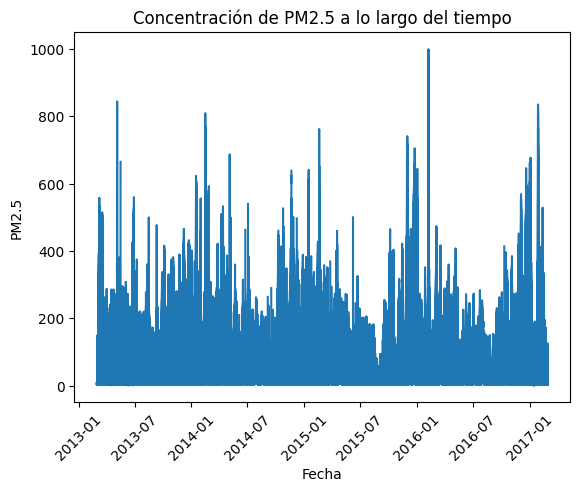

In [66]:
import matplotlib.pyplot as plt

# Graficar la concentración de PM2.5 a lo largo del tiempo
plt.plot(concatenated_df['Date'], concatenated_df['PM2.5'])
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.title('Concentración de PM2.5 a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

##Average pollutant values per station

<ipython-input-67-ba428a745234>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_parameters = concatenated_df.groupby('station')['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean()


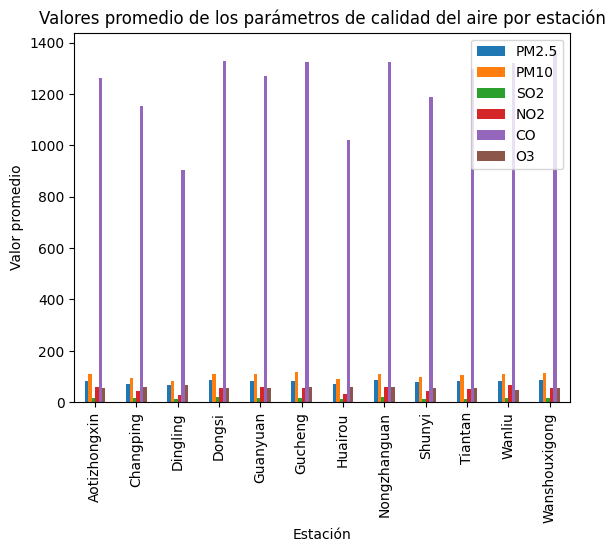

In [67]:
# Calcular el promedio de los parámetros por estación
mean_parameters = concatenated_df.groupby('station')['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].mean()

# Graficar los valores promedio de los parámetros
mean_parameters.plot(kind='bar')
plt.xlabel('Estación')
plt.ylabel('Valor promedio')
plt.title('Valores promedio de los parámetros de calidad del aire por estación')
plt.legend(loc='upper right')
plt.show()

##Concentration of pollutants by year

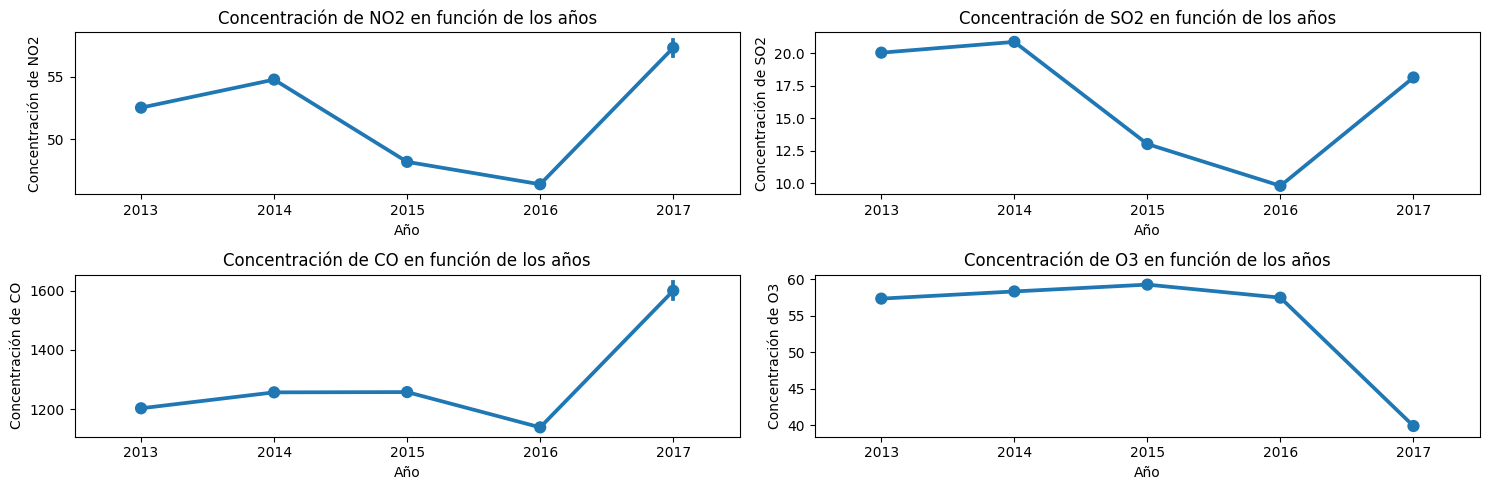

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con una cuadrícula de 1 fila y 3 columnas
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

# Graficar la concentración de NO2 en función de los años
sns.pointplot(x='year', y='NO2', data=concatenated_df, ax=axs[0,0])
axs[0,0].set_xlabel('Año')
axs[0,0].set_ylabel('Concentración de NO2')
axs[0,0].set_title('Concentración de NO2 en función de los años')

# Graficar la concentración de SO2 en función de los años
sns.pointplot(x='year', y='SO2', data=concatenated_df, ax=axs[0,1])
axs[0,1].set_xlabel('Año')
axs[0,1].set_ylabel('Concentración de SO2')
axs[0,1].set_title('Concentración de SO2 en función de los años')

# Graficar la concentración de CO en función de los años
sns.pointplot(x='year', y='CO', data=concatenated_df, ax=axs[1,0])
axs[1,0].set_xlabel('Año')
axs[1,0].set_ylabel('Concentración de CO')
axs[1,0].set_title('Concentración de CO en función de los años')

# Graficar la concentración de O3 en función de los años
sns.pointplot(x='year', y='O3', data=concatenated_df, ax=axs[1,1])
axs[1,1].set_xlabel('Año')
axs[1,1].set_ylabel('Concentración de O3')
axs[1,1].set_title('Concentración de O3 en función de los años')

# Ajustar los espacios entre las gráficas
plt.tight_layout()

# Mostrar la figura
plt.show()


##PM2.5 per station


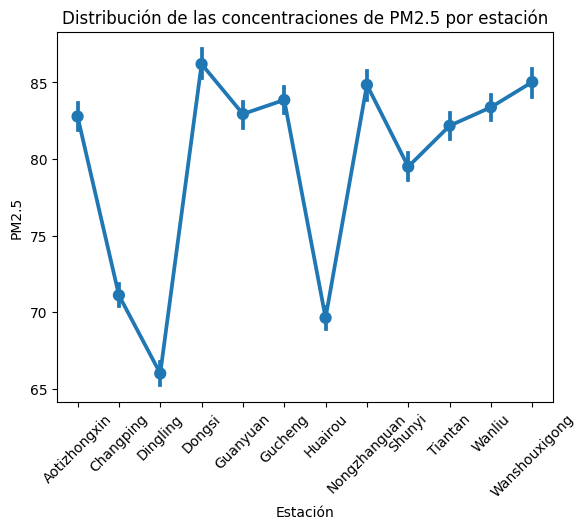

In [69]:
# Graficar las concentraciones de PM2.5 por estación utilizando un pointplot
sns.pointplot(x='station', y='PM2.5', data=concatenated_df)
plt.xlabel('Estación')
plt.ylabel('PM2.5')
plt.title('Distribución de las concentraciones de PM2.5 por estación')
plt.xticks(rotation=45)
plt.show()

##Pollution by station and hour during 2017.

<ipython-input-70-10daefcc8512>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_contaminants = df_2017.groupby(['hour', 'station']).mean().reset_index()


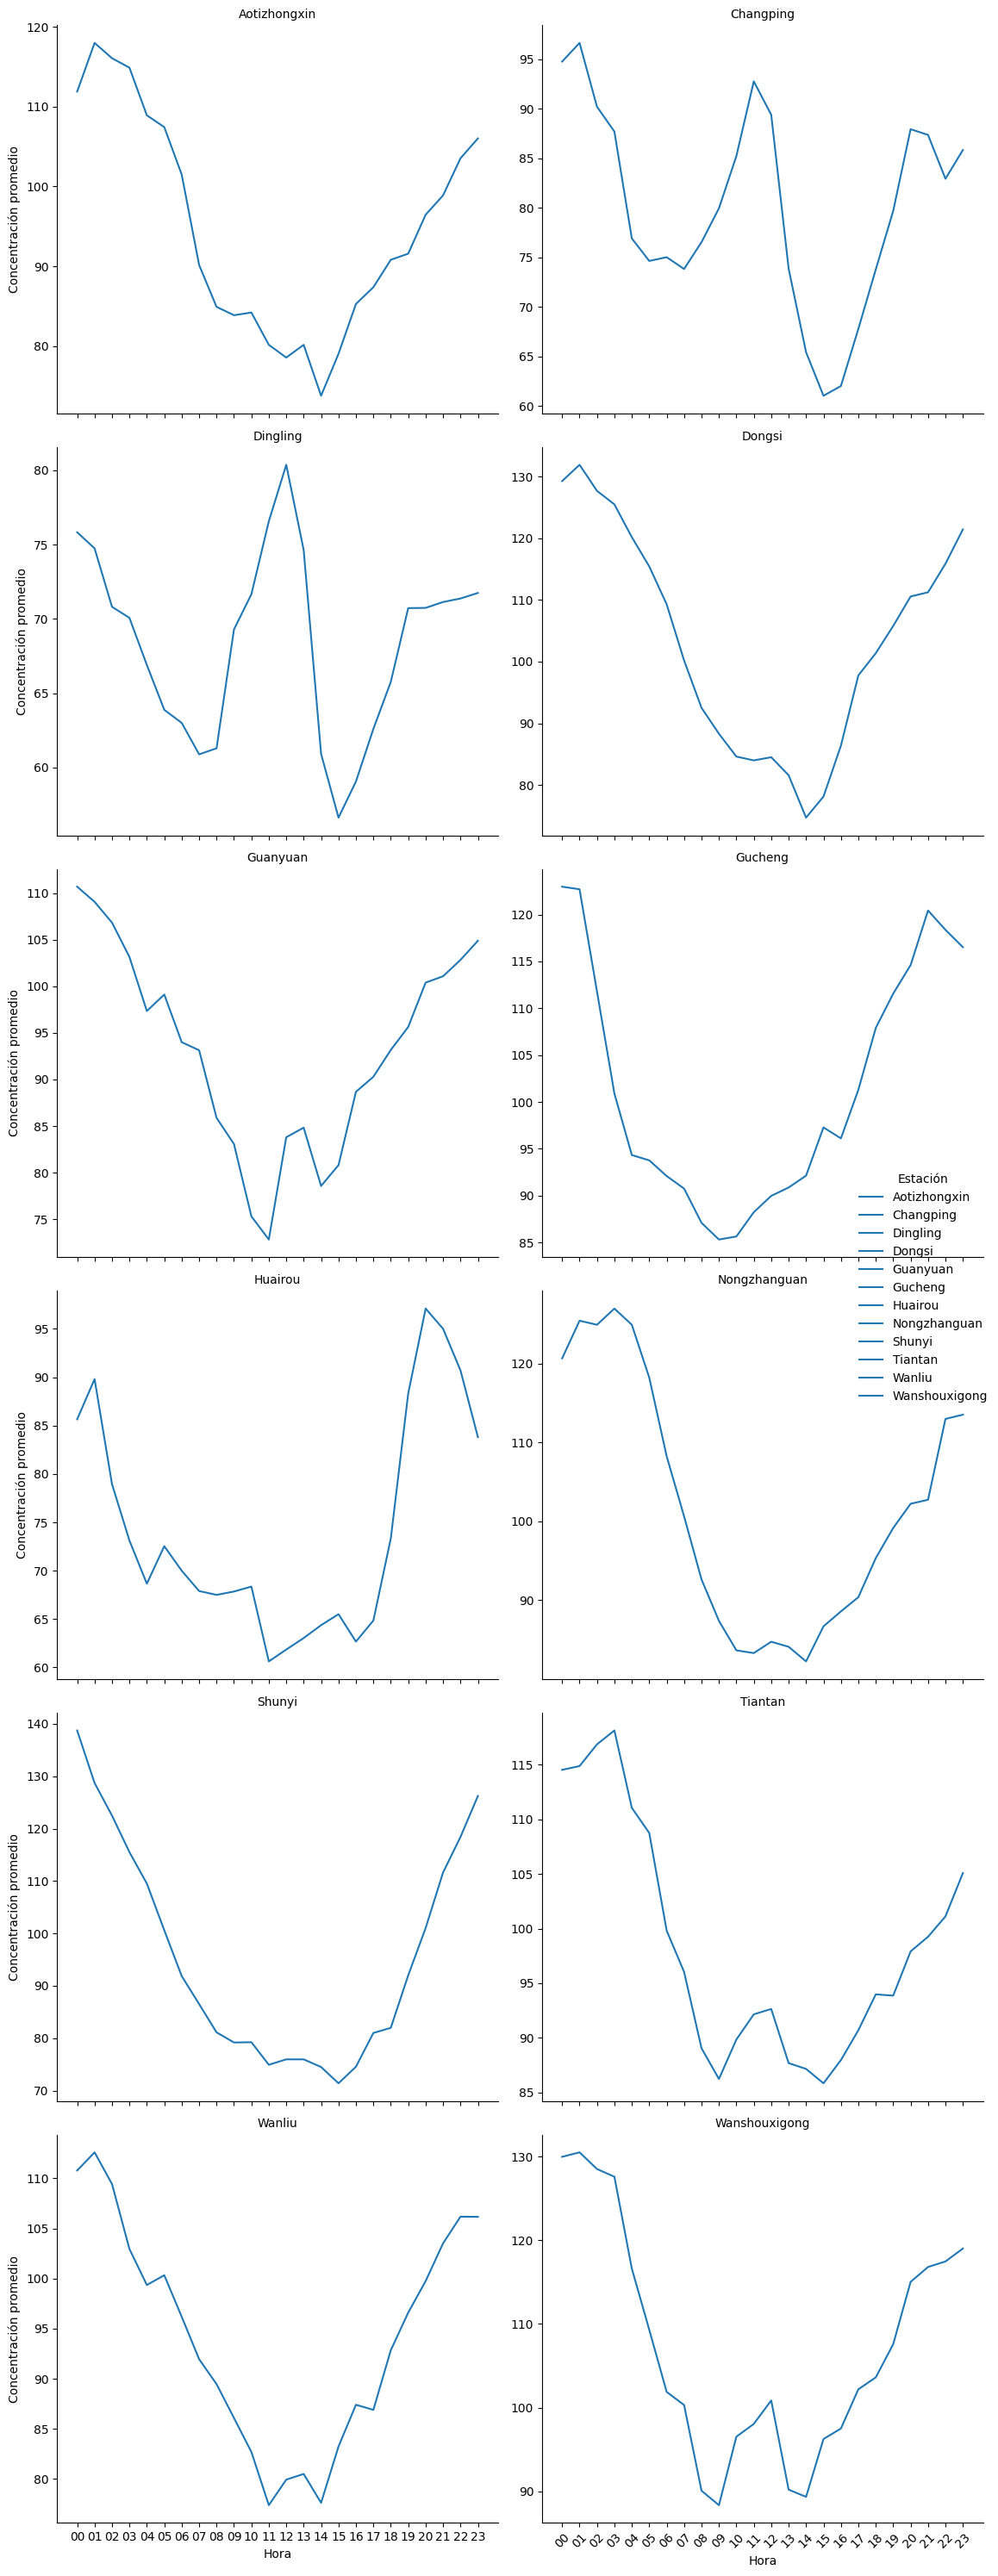

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Filtrar los datos para el año 2017
df_2017 = concatenated_df[concatenated_df['year'] == 2017]

# Agrupar los datos por hora, estación y contaminante, y calcular el promedio
mean_contaminants = df_2017.groupby(['hour', 'station']).mean().reset_index()

# Crear un FacetGrid con una gráfica por cada estación
grid = sns.FacetGrid(mean_contaminants, col='station', col_wrap=2, height=5, sharey=False)

# Graficar los contaminantes por hora en cada estación
grid.map_dataframe(sns.lineplot, x='hour', y='PM2.5', hue='station', data=mean_contaminants)
grid.set_axis_labels('Hora', 'Concentración promedio')
grid.set_titles('{col_name}')
grid.add_legend(title='Estación')

# Obtener las etiquetas de las horas
hour_labels = [datetime.strptime(str(hour), "%H").strftime("%H") for hour in mean_contaminants['hour'].unique()]

# Agregar las etiquetas de las horas en el eje x con rotación de 45 grados
plt.xticks(range(24), hour_labels, rotation=45)

plt.tight_layout()
plt.show()


#Data processing

In [71]:
#Copy of the database to prevent potential future errors
Beijing_Air_Quality=concatenated_df.copy()
Beijing_Air_Quality

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,WindSpeed,station,Date,AQI_PM2.5,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,4.4,Aotizhongxin,2013-03-01 00:00:00,16,3,5,6,0,122,122
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,4.7,Aotizhongxin,2013-03-01 01:00:00,33,7,5,6,0,122,122
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,5.6,Aotizhongxin,2013-03-01 02:00:00,29,6,7,9,0,108,108
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,3.1,Aotizhongxin,2013-03-01 03:00:00,25,5,15,10,0,104,104
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,2.0,Aotizhongxin,2013-03-01 04:00:00,12,2,17,11,0,104,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,...,2.4,Wanshouxigong,2017-02-28 19:00:00,45,29,4,22,0,104,104
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,...,0.9,Wanshouxigong,2017-02-28 20:00:00,52,29,4,38,0,46,52
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,...,1.1,Wanshouxigong,2017-02-28 21:00:00,54,25,5,35,0,50,54
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,...,1.2,Wanshouxigong,2017-02-28 22:00:00,50,21,5,28,0,64,64


In [72]:
#The info function is used to determine the variable type of the data for imputation purposes
# o para
Beijing_Air_Quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   year           420768 non-null  int64         
 1   month          420768 non-null  int64         
 2   day            420768 non-null  int64         
 3   hour           420768 non-null  int64         
 4   PM2.5          412029 non-null  float64       
 5   PM10           414319 non-null  float64       
 6   SO2            411747 non-null  float64       
 7   NO2            408652 non-null  float64       
 8   CO             400067 non-null  float64       
 9   O3             407491 non-null  float64       
 10  TEMP           420370 non-null  float64       
 11  PRES           420375 non-null  float64       
 12  DEWP           420365 non-null  float64       
 13  RAIN           420378 non-null  float64       
 14  WindDirection  418946 non-null  object        
 15  W

###Formato de variables

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [74]:
#Tranformar variables categoricas a numericas
Beijing_Air_Quality['WindDirection']=le.fit_transform(Beijing_Air_Quality['WindDirection'])
Beijing_Air_Quality['station']=le.fit_transform(Beijing_Air_Quality['station'])


###Eliminación de columnas innecesarias

In [75]:
Beijing_Air_Quality.drop(['hour','Date'],axis=1, inplace=True)


In [76]:
#Beijing_Air_Quality.drop(['TEMP','PRES','DEWP','RAIN','WindDirection','WindSpeed','station'],axis=1, inplace=True)


In [77]:
Beijing_Air_Quality.drop(['AQI_PM2.5', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3'],axis=1, inplace=True)


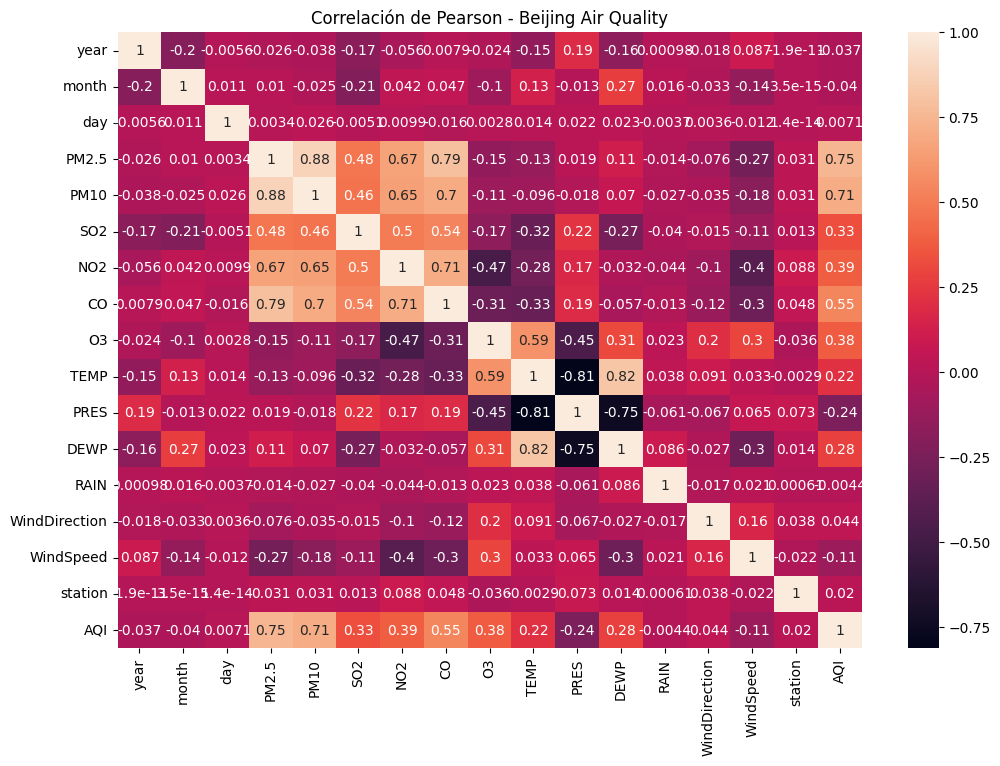

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV

# Calcular la matriz de correlación de Pearson
corr_matrix = Beijing_Air_Quality.corr()

# Crear un gráfico de correlación utilizando Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlación de Pearson - Beijing Air Quality')
plt.show()


##Eliminacion de atípicos


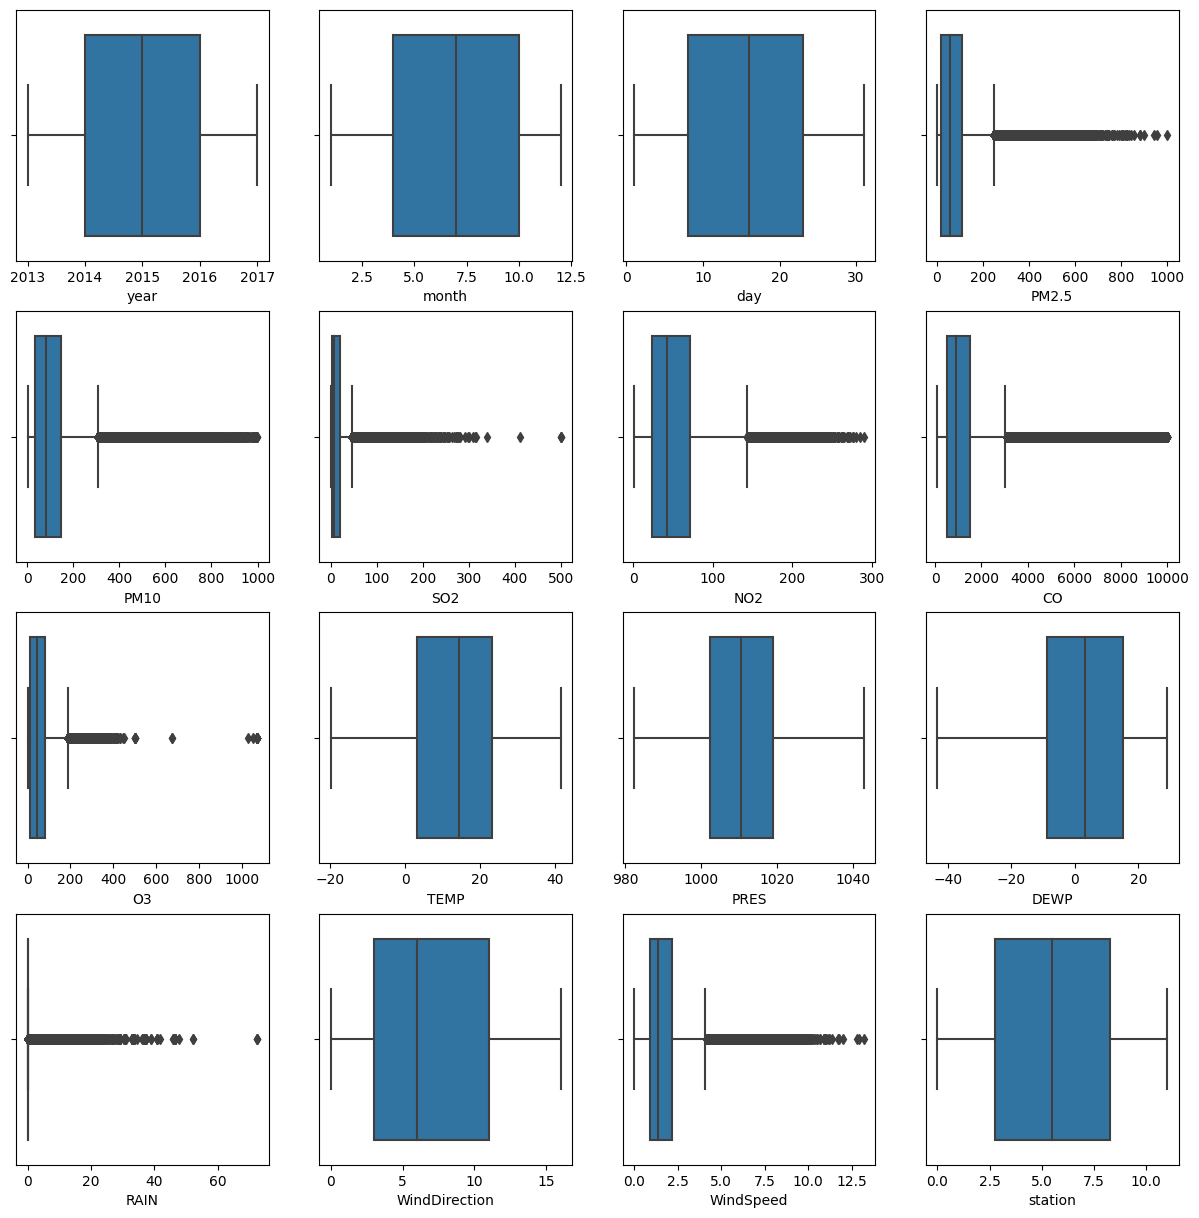

In [79]:
plt.figure(figsize=(15,15))
c =Beijing_Air_Quality.columns[:-1]
for i in enumerate(c):
  plt.subplot(4,4,i[0]+1)
  sns.boxplot(x=i[1],data=Beijing_Air_Quality)


In [80]:
for i in c:
  q1=Beijing_Air_Quality[i].quantile(0.05)#valor de lo que se va a borra
  q4=Beijing_Air_Quality[i].quantile(0.95)#valor
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]>=q4]=q4


<ipython-input-80-c0f4740ef4ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
<ipython-input-80-c0f4740ef4ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]>=q4]=q4
<ipython-input-80-c0f4740ef4ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Beijing_Air_Quality[i][Beijing_Air_Quality[i]<=q1]=q1
<ipython-input-80-c0f4740ef4ad>:5:

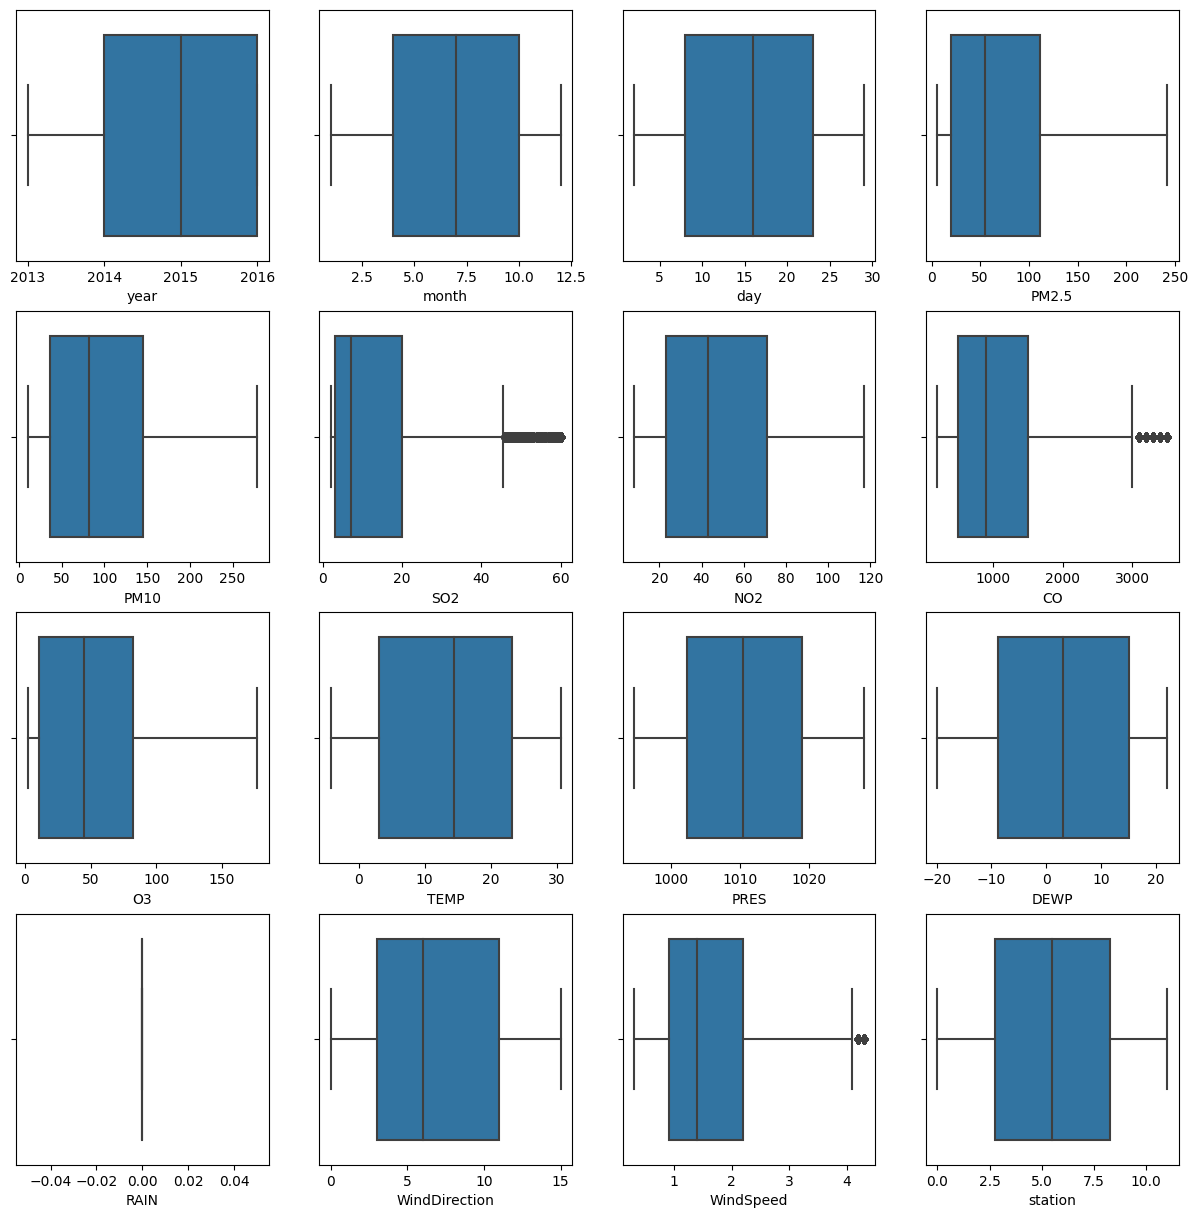

In [81]:
plt.figure(figsize=(15,15))
c =Beijing_Air_Quality.columns[:-1]
for i in enumerate(c):
  plt.subplot(4,4,i[0]+1)
  sns.boxplot(x=i[1],data=Beijing_Air_Quality)

##Valores nulos

In [82]:
Beijing_Air_Quality.isnull().sum()

year                 0
month                0
day                  0
PM2.5             8739
PM10              6449
SO2               9021
NO2              12116
CO               20701
O3               13277
TEMP               398
PRES               393
DEWP               403
RAIN               390
WindDirection        0
WindSpeed          318
station              0
AQI                  0
dtype: int64

In [83]:
# fill the null values in numerical columns with average
Beijing_Air_Quality['PM2.5'].fillna(Beijing_Air_Quality['PM2.5'].mean(), inplace=True)
Beijing_Air_Quality['PM10'].fillna(Beijing_Air_Quality['PM10'].mean(), inplace=True)
Beijing_Air_Quality['SO2'].fillna(Beijing_Air_Quality['SO2'].mean(), inplace=True)
Beijing_Air_Quality['NO2'].fillna(Beijing_Air_Quality['NO2'].mean(), inplace=True)
Beijing_Air_Quality['CO'].fillna(Beijing_Air_Quality['CO'].mean(), inplace=True)
Beijing_Air_Quality['O3'].fillna(Beijing_Air_Quality['O3'].mean(), inplace=True)

In [84]:
Beijing_Air_Quality['TEMP'].fillna(Beijing_Air_Quality['TEMP'].mean(), inplace=True)
Beijing_Air_Quality['PRES'].fillna(Beijing_Air_Quality['PRES'].mean(), inplace=True)
Beijing_Air_Quality['DEWP'].fillna(Beijing_Air_Quality['DEWP'].mean(), inplace=True)
Beijing_Air_Quality['RAIN'].fillna(Beijing_Air_Quality['RAIN'].mean(), inplace=True)
Beijing_Air_Quality['WindSpeed'].fillna(Beijing_Air_Quality['WindSpeed'].mean(), inplace=True)

In [85]:
#En caso de usar estas variables
# Fill null values in 'WindDirection' column with mode
Beijing_Air_Quality['WindDirection'].fillna(Beijing_Air_Quality['WindDirection'].mode()[0])
# Fill null values in 'station' column with mode
Beijing_Air_Quality['station'].fillna(Beijing_Air_Quality['station'].mode()[0])

0         0
1         0
2         0
3         0
4         0
         ..
35059    11
35060    11
35061    11
35062    11
35063    11
Name: station, Length: 420768, dtype: int64

In [86]:
Beijing_Air_Quality.isnull().sum()

year             0
month            0
day              0
PM2.5            0
PM10             0
SO2              0
NO2              0
CO               0
O3               0
TEMP             0
PRES             0
DEWP             0
RAIN             0
WindDirection    0
WindSpeed        0
station          0
AQI              0
dtype: int64

#Model Training and Evaluation

##Splitting the data

In [87]:
from sklearn.model_selection import train_test_split

# Dividir los datos en características (X) y variable objetivo (y)
X = Beijing_Air_Quality.drop(['AQI'], axis=1)  # Características (todas las columnas excepto AQI)
y = Beijing_Air_Quality['AQI']  # Variable objetivo (AQI)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##Training and testing

###Modelo Regresión Lineal

In [93]:
from sklearn.linear_model import LinearRegression
# Crear el modelo de regresión lineal
reg_model = LinearRegression()
# Entrenar el modelo
reg_model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_rl = reg_model.predict(X_test)

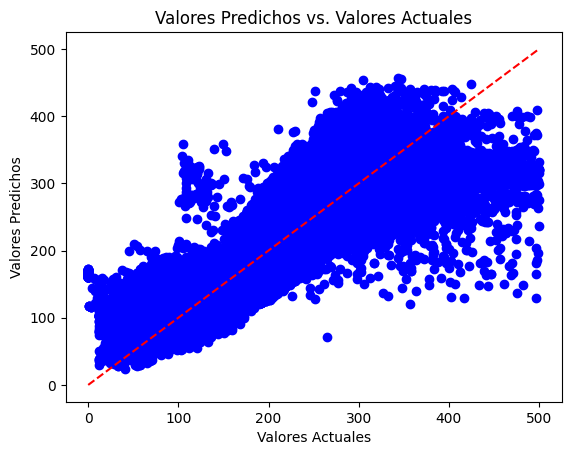

In [102]:
import matplotlib.pyplot as plt

# Graficar los valores predichos versus los valores actuales
plt.scatter(y_test, y_pred_rl, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()


###Modelo Random Forest

In [91]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


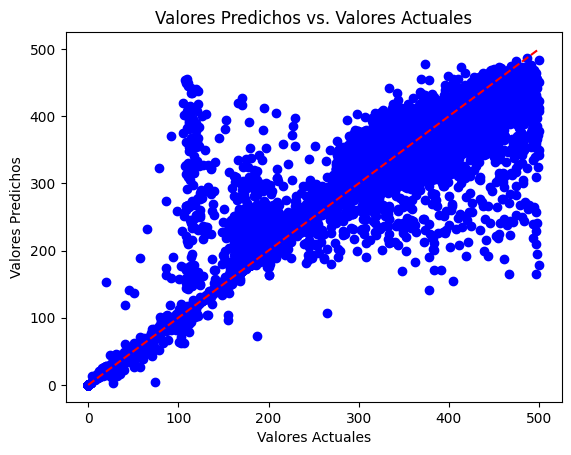

In [108]:
import matplotlib.pyplot as plt

# Graficar los valores predichos versus los valores actuales
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Actuales')
plt.ylabel('Valores Predichos')
plt.title('Valores Predichos vs. Valores Actuales')
plt.show()

###SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(max_iter = 5000,random_state = 42)
sgd_model.fit(X_train, y_train)

y_pred_sgd = sgd_model.predict(X_test)


##Selecting and Computing evaluation metrics

###Modelo Regresión Lineal

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_rl)
r2 = r2_score(y_test, y_pred_rl)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 1669.4704268523824
Coeficiente de determinación (R2): 0.9761334262983795


###Modelo Random Forest

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 174.05016984259015
Coeficiente de determinación (R2): 0.9761334262983795


###SGD

In [ ]:
mse = mean_squared_error(y_test, y_pred_sgd)
r2 = r2_score(y_test, y_pred_rf)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

##Cross-validation

In [110]:
from sklearn.model_selection import cross_val_score

# Example of cross-validation using 5 folds
scores = cross_val_score(reg_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.75887691 0.77153366 0.76458975 0.77026749 0.78472742]
Average Accuracy: 0.7699990464874922


In [111]:
# Example of cross-validation using 5 folds
scores = cross_val_score(random_forest_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.97328654 0.97097929 0.96926861 0.97347745 0.97037728]
Average Accuracy: 0.9714778375660063


In [ ]:
# Example of cross-validation using 5 folds
scores = cross_val_score(sgd_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

##Hyperparameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning using grid search
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid_search = GridSearchCV(reg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print('Best parameters', best_params)

ValueError: ignored

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('Best parameters', best_params)